<a href="https://colab.research.google.com/github/YasuharuSuzuki/23_programing2/blob/main/" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ライブラリの読み込み
- pip install が必要なライブラリはpipを使用してインストールする
- importを使用してライブラリを読み込む

In [1]:
# matplotlib日本語対応ライブラリのインストール
!pip install japanize_matplotlib

In [2]:
# importライブラリ
from sklearn import datasets # scikit-learnのdatasetsライブラリ
from sklearn import svm # scikit-learnのSVM(サポートベクターマシン)
from sklearn.model_selection import ShuffleSplit # データをシャッフルして分割する機能
from sklearn import metrics # scikit-learnの精度算出用ライブラリ
from sklearn.ensemble import RandomForestClassifier # scikit-learnのRandomForest(ランダムフォレスト)

import pandas as pd # データ分析ライブラリ
import seaborn as sns # データ可視化ライブラリ。Matplotlibより見やすいデザインで可視化する機能がいくつかある
import numpy as np # 数値演算ライブラリ
import matplotlib.pyplot as plt # 可視化ライブラリ
import japanize_matplotlib # matplotlibで日本語表示できない時にpipでライブラリをインストールして、有効にしてみてください

### 定数の定義
- データファイルパスを定義しておきます
- データ読み込みの際にご使用してください。修正は不要です

In [3]:
# データファイルパス定義
KAMOKU_XLSX = "./data/kamoku.xlsx"

## 21. 成績データの読み込み(0.5点)
1. ./data/kamoku.xlsx を読み込みましょう
  - csvで課題ごとの点数と成績が定義されているため、DataFrame型で読み込みましょう
    - ヒント：read_excel()という関数を使うと読込みできます。
      - [参考サイト：read_excel()](https://note.nkmk.me/python-pandas-read-excel/)
      - index引数をNoneにするとインデックスが0始まりの連番で作成されます
      - 課題名は0埋め2桁の数字 ＋ A　or B の組み合わせで出来ています。
  - 読み込んだデータは df_kamoku というDataFrame型の変数に格納してください。

## 22. 読み込んだDataFrame型の変数を表示(0.5点)
- 変数を表示するだけのプログラムを書いておきますので、プログラムを修正せずに同じデータが出力されれば正解です

In [5]:
print("データ件数＝", len(df_kamoku))

pd.concat([df_kamoku.head(), df_kamoku.tail()])

データ件数＝ 116


,01A,02A,00B,03A,01B,04A,05A,02B,06A,03B,...,07B,09A,10A,08B,11A,09B,12A,10B,13A,成績
0,2.274344,2.373160,1.035812,1.969012,1.070193,1.917491,2.087871,0.969064,2.040586,0.953083,...,1.050302,2.188500,2.326553,0.964007,2.162754,1.005650,2.092615,0.978481,5.646146,秀
1,2.274344,2.373160,1.035812,2.099645,1.070193,2.068924,2.087871,1.018143,2.040586,0.953083,...,0.939782,2.561477,2.252687,1.006347,2.388208,1.057681,2.092615,0.978481,4.529296,秀
2,2.069824,2.319778,1.035812,1.969012,0.903206,2.068924,1.932482,0.993604,2.177676,0.888269,...,1.050302,2.312826,2.104955,0.949893,2.388208,0.953620,2.092615,0.941086,4.618902,秀
3,2.342518,2.052867,1.035812,2.099645,1.042361,2.068924,2.087871,0.993604,2.040586,0.953083,...,0.995042,2.437151,2.252687,0.978120,2.388208,1.005650,1.700398,1.015875,4.122841,秀
4,2.274344,1.785956,1.035812,2.099645,1.042361,2.220358,2.087871,0.944525,2.040586,0.953083,...,1.050302,2.188500,2.252687,0.978120,2.388208,1.005650,2.092615,0.978481,4.081265,秀
111,1.933477,-0.300000,1.035812,-0.300000,-0.100000,-0.300000,-0.300000,-0.100000,-0.300000,-0.100000,...,-0.100000,-0.300000,-0.300000,-0.100000,-0.300000,-0.100000,-0.300000,-0.100000,-0.300000,不可
112,1.933477,-0.300000,1.035812,-0.300000,-0.100000,-0.300000,-0.300000,-0.100000,-0.300000,-0.100000,...,-0.100000,-0.300000,-0.300000,-0.100000,-0.300000,-0.100000,-0.300000,-0.100000,-0.300000,不可
113,-0.300000,1.679192,0.885812,-0.300000,-0.100000,-0.300000,-0.300000,-0.100000,-0.300000,-0.100000,...,-0.100000,-0.300000,-0.300000,-0.100000,-0.300000,-0.100000,-0.300000,-0.100000,-0.300000,不可
114,-0.300000,-0.300000,-0.100000,1.969012,-0.100000,-0.300000,-0.300000,-0.100000,-0.300000,-0.100000,...,-0.100000,-0.300000,-0.300000,-0.100000,-0.300000,-0.100000,-0.300000,-0.100000,-0.300000,不可
115,-0.300000,-0.300000,-0.100000,-0.300000,-0.100000,-0.300000,-0.300000,-0.100000,-0.300000,-0.100000,...,-0.100000,-0.300000,-0.300000,-0.100000,-0.300000,-0.100000,-0.300000,-0.100000,-0.300000,不可


In [6]:
df_kamoku.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   01A     116 non-null    float64
 1   02A     116 non-null    float64
 2   00B     116 non-null    float64
 3   03A     116 non-null    float64
 4   01B     116 non-null    float64
 5   04A     116 non-null    float64
 6   05A     116 non-null    float64
 7   02B     116 non-null    float64
 8   06A     116 non-null    float64
 9   03B     116 non-null    float64
 10  07A     116 non-null    float64
 11  04B     116 non-null    float64
 12  05B     116 non-null    float64
 13  06B     116 non-null    float64
 14  08A     116 non-null    float64
 15  07B     116 non-null    float64
 16  09A     116 non-null    float64
 17  10A     116 non-null    float64
 18  08B     116 non-null    float64
 19  11A     116 non-null    float64
 20  09B     116 non-null    float64
 21  12A     116 non-null    float64
 22  10

In [7]:
df_kamoku.describe()

,01A,02A,00B,03A,01B,04A,05A,02B,06A,03B,...,08A,07B,09A,10A,08B,11A,09B,12A,10B,13A
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,...,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000
mean,1.694206,1.648018,0.721913,1.584706,0.670297,1.493540,1.494168,0.617240,1.617833,0.689369,...,1.532089,0.641846,1.537146,1.474725,0.628212,1.534612,0.676897,1.529897,0.650487,1.872487
std,0.600268,0.694588,0.315054,0.741122,0.366689,0.841107,0.837130,0.400672,0.723166,0.334067,...,0.813443,0.386713,0.810313,0.853548,0.382068,0.815241,0.358794,0.814345,0.377123,1.424842
min,-0.300000,-0.300000,-0.100000,-0.300000,-0.100000,-0.300000,-0.300000,-0.100000,-0.300000,-0.100000,...,-0.300000,-0.100000,-0.300000,-0.300000,-0.100000,-0.300000,-0.100000,-0.300000,-0.100000,-0.300000
25%,1.394870,1.452318,0.511043,1.577114,0.453441,1.311757,1.466315,0.365982,1.492226,0.612811,...,1.316562,0.446221,1.195641,1.261758,0.422969,1.260936,0.441657,1.308182,0.429107,1.005940
50%,1.865304,1.839339,0.773427,1.969012,0.777966,1.917491,1.932482,0.748211,1.903496,0.823456,...,1.812823,0.774002,1.815524,1.831089,0.808758,1.711845,0.800574,2.092615,0.828902,1.793080
75%,2.137997,2.106249,1.035812,1.969012,0.986699,2.068924,2.087871,0.969064,2.040586,0.888269,...,2.096402,0.939782,2.064175,2.104955,0.935780,2.162754,0.953620,2.092615,0.941086,2.880362
max,2.342518,2.479925,1.035812,2.099645,1.070193,2.220358,2.087871,1.018143,2.177676,0.953083,...,2.379980,1.050302,2.561477,2.326553,1.006347,2.388208,1.057681,2.092615,1.015875,5.646146


In [8]:
df_kamoku.describe().loc["max",:].T

01A    2.342518
02A    2.479925
00B    1.035812
03A    2.099645
01B    1.070193
04A    2.220358
05A    2.087871
02B    1.018143
06A    2.177676
03B    0.953083
07A    2.322807
04B    0.957214
05B    0.907969
06B    0.977840
08A    2.379980
07B    1.050302
09A    2.561477
10A    2.326553
08B    1.006347
11A    2.388208
09B    1.057681
12A    2.092615
10B    1.015875
13A    5.646146
Name: max, dtype: float64

#### データビューイング
- 最大値がかなりばらばら

In [9]:
# 10番目〜11番目の人の課題と成績表示
df_kamoku.loc[10:11,:].T

,10,11
01A,1.728957,2.274344
02A,2.479925,2.426542
00B,0.511043,0.773427
03A,2.099645,2.099645
01B,1.01453,1.01453
04A,1.917491,2.220358
05A,2.087871,2.087871
02B,0.969064,1.018143
06A,2.177676,1.766406
03B,0.758642,0.823456


#### データビューイング
- AとBの組み合わせがだいたい揃っているが、無いものもある
  - 00A、11B、12B、13B が無い
- 最後の成績だけは文字列で保存されている。その他はfloat

In [10]:
# 課題ごとの点数（訓練データ）を抽出する
df_kamoku.iloc[10:12,:24].T

,10,11
01A,1.728957,2.274344
02A,2.479925,2.426542
00B,0.511043,0.773427
03A,2.099645,2.099645
01B,1.014530,1.014530
04A,1.917491,2.220358
05A,2.087871,2.087871
02B,0.969064,1.018143
06A,2.177676,1.766406
03B,0.758642,0.823456


In [11]:
# 成績（教師データ)を抽出する
df_kamoku.iloc[10:12,24:25].T

,10,11
成績,良,秀


## 23. 成績を分類する(0.5点)
- 分類器は何を使用しても良いです(SVCやRandomForest以外でも可）
- 正答率やclassification report、confusion matrix

In [12]:
# 訓練データとテストデータに分ける




In [13]:
# データを分割するインデックスを作る




In [14]:
# データを分割する



# 学習する



SVC()

#### 正答率を調べる

正答率 = 0.46808510638297873
誤った個数：25


In [16]:
# 分類レポート




classification report


/Users/suzuki_yasuharu/mambaforge/envs/base23/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/suzuki_yasuharu/mambaforge/envs/base23/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/suzuki_yasuharu/mambaforge/envs/base23/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

,precision,recall,f1-score,support
不可,0.562500,1.000000,0.720000,9.000000
優,0.320000,1.000000,0.484848,8.000000
可,0.000000,0.000000,0.000000,9.000000
秀,1.000000,0.200000,0.333333,10.000000
良,0.750000,0.272727,0.400000,11.000000
accuracy,0.468085,0.468085,0.468085,0.468085
macro avg,0.526500,0.494545,0.387636,47.000000
weighted avg,0.550479,0.468085,0.384939,47.000000


confusion matrix


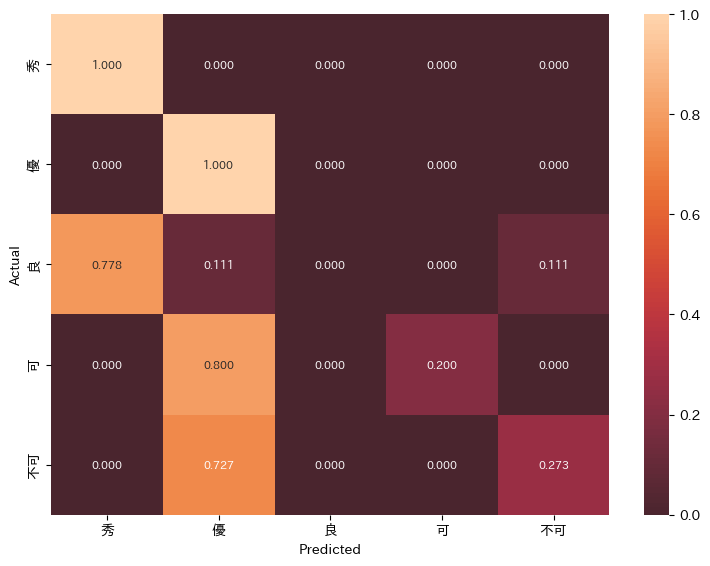

In [18]:
# 混合行列





---
---
---
---
---